In [61]:
import pandas as pd
df = pd.read_csv('/content/reddit_metadata (1).csv')
df.head()

,ID,hasImage,user_name_len,title_len,num_comments,subreddit,upvote_ratio,score,upvote_ratio.1,2_way_label
0,0,True,11.0,92.0,2.0,mildlyinteresting,0.84,12,0.84,1
1,1,True,9.0,NaN,NaN,psbattle_artwork,NaN,5,NaN,0
2,2,True,8.0,35.0,2.0,pareidolia,0.99,119,0.99,0
3,3,True,14.0,45.0,1.0,neutralnews,0.92,44,0.92,1
4,4,True,NaN,NaN,NaN,psbattle_artwork,NaN,3,NaN,0


In [62]:
#1/ Inspect data types (and transform if needed) (2 marks)
df=df.drop(columns=['upvote_ratio.1'])
df.info()
df['subreddit']=df.subreddit.astype('category').cat.codes #To convert it to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878218 entries, 0 to 878217
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             878218 non-null  int64  
 1   hasImage       878218 non-null  bool   
 2   user_name_len  729472 non-null  float64
 3   title_len      804378 non-null  float64
 4   num_comments   636118 non-null  float64
 5   subreddit      878218 non-null  object 
 6   upvote_ratio   636118 non-null  float64
 7   score          878218 non-null  int64  
 8   2_way_label    878218 non-null  int64  
dtypes: bool(1), float64(4), int64(3), object(1)
memory usage: 54.4+ MB


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878218 entries, 0 to 878217
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             878218 non-null  int64  
 1   hasImage       878218 non-null  bool   
 2   user_name_len  729472 non-null  float64
 3   title_len      804378 non-null  float64
 4   num_comments   636118 non-null  float64
 5   subreddit      878218 non-null  int8   
 6   upvote_ratio   636118 non-null  float64
 7   score          878218 non-null  int64  
 8   2_way_label    878218 non-null  int64  
dtypes: bool(1), float64(4), int64(3), int8(1)
memory usage: 48.6 MB


In [64]:
df.isna().sum() #missing value


,0
ID,0
hasImage,0
user_name_len,148746
title_len,73840
num_comments,242100
subreddit,0
upvote_ratio,242100
score,0
2_way_label,0


In [65]:
#replace missing value with each column's average value, replace NaN values in 'user_name_len'
df['user_name_len'].fillna(df['user_name_len'].mean(),inplace=True)
df['title_len'].fillna(df['title_len'].mean(),inplace=True)
df['num_comments'].fillna(df['num_comments'].mean(),inplace=True)
df['upvote_ratio'].fillna(df['upvote_ratio'].mean(),inplace=True)


<ipython-input-65-bcce96287568>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_name_len'].fillna(df['user_name_len'].mean(),inplace=True)
<ipython-input-65-bcce96287568>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [66]:
df.isna().sum() #inspect missing values again

,0
ID,0
hasImage,0
user_name_len,0
title_len,0
num_comments,0
subreddit,0
upvote_ratio,0
score,0
2_way_label,0


In [67]:
df.describe()

,ID,user_name_len,title_len,num_comments,subreddit,upvote_ratio,score,2_way_label
count,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000
mean,439108.500000,11.277863,50.196185,17.887040,8.925496,0.853566,312.269706,0.455961
std,253519.843692,3.308823,34.098731,105.596006,4.497380,0.099406,2621.030757,0.498057
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.500000,-950.000000,0.000000
25%,219554.250000,9.000000,27.000000,1.000000,5.000000,0.810000,3.000000,0.000000
50%,439108.500000,11.277863,48.000000,5.000000,9.000000,0.853566,10.000000,0.000000
75%,658662.750000,14.000000,64.000000,17.887040,12.000000,0.920000,34.000000,1.000000
max,878217.000000,20.000000,2904.000000,10783.000000,21.000000,1.000000,137179.000000,1.000000


In [68]:
# Inspect outliers (and replace if needed) (2 marks)
df.loc[df['title_len']>750]
df.loc[df['title_len']>750].index
df_imputed=df.drop(df.loc[df['title_len']>750].index)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


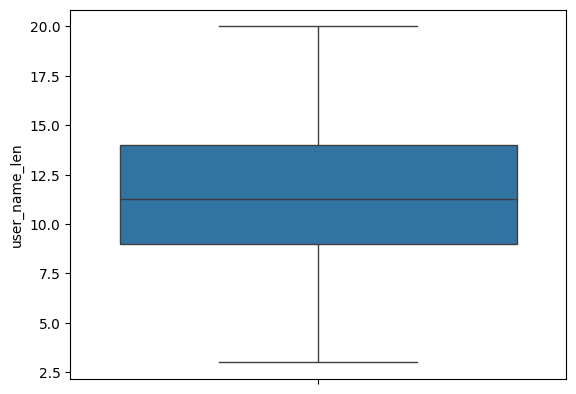

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt # use boxplot to determine the outliners
sns.boxplot(df['user_name_len'])
plt.show()

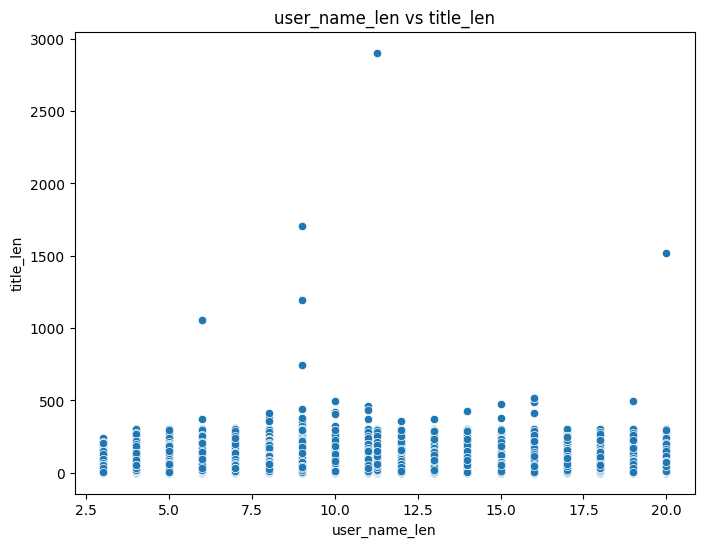

In [70]:
#contains at least four different plots for visualization and one of them related to correlation (2 marks)
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to examine the correlation between two continuous variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='user_name_len', y='title_len', data=df)
plt.title("user_name_len vs title_len")
plt.xlabel('user_name_len')
plt.ylabel('title_len')
plt.show()

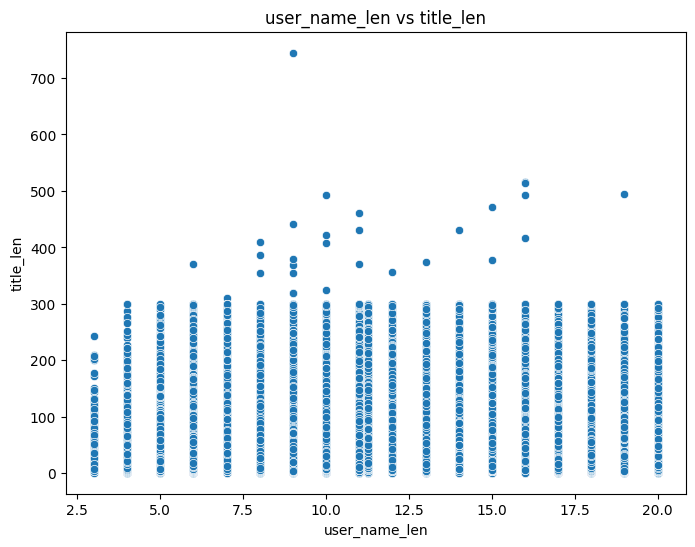

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='user_name_len', y='title_len', data=df_imputed)
plt.title("user_name_len vs title_len")
plt.xlabel('user_name_len')
plt.ylabel('title_len')
plt.show() # drop plots above 750 in title_len

<Axes: >

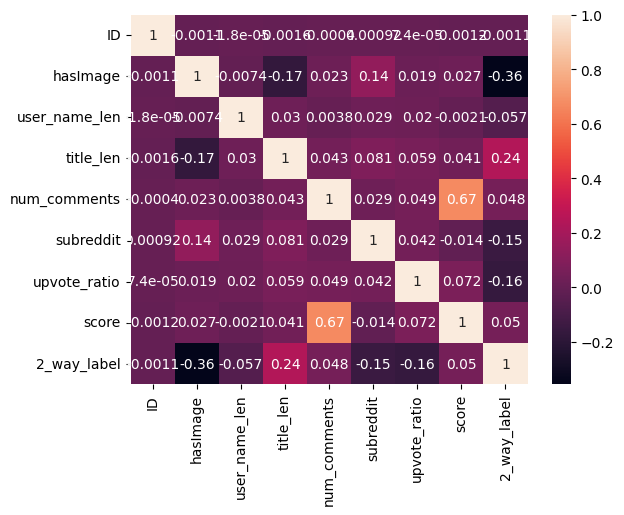

In [72]:
import seaborn as sns
feature_correlations=df.corr()
sns.heatmap(feature_correlations,annot=True) #heatmap showing the correlation


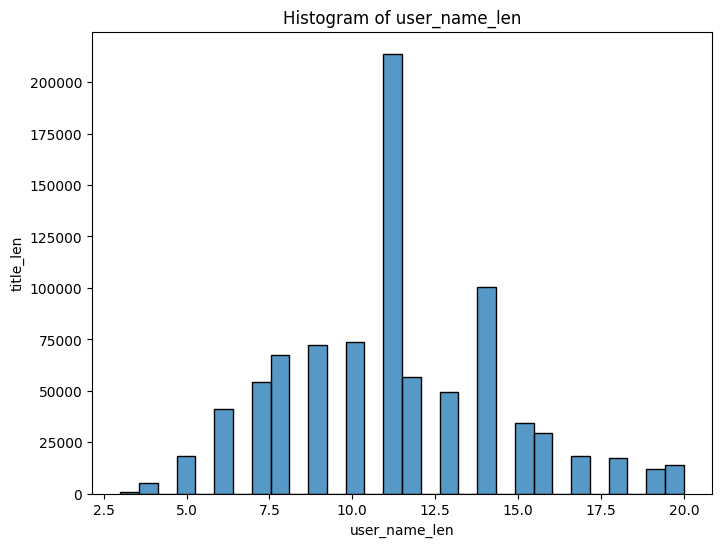

In [73]:
plt.figure(figsize=(8, 6))
sns.histplot(df['user_name_len'], bins=30)
plt.title("Histogram of user_name_len")
plt.xlabel('user_name_len')
plt.ylabel('title_len')
plt.show() #Drew the histogram of user_name_len

In [81]:
 #use holdout method to train a logistic regression model (2 marks)

 #use 30% of data for testing
 from sklearn.model_selection import train_test_split
 training_df,testing_df=train_test_split(df,test_size=0.3)
 #use 'hasImage','title_len', 'num_comments','upvote_ratio','score'
 training_x=training_df[['hasImage','title_len', 'num_comments','upvote_ratio','score']]
 training_y=training_df[['2_way_label']]
 testing_x=testing_df[['hasImage','title_len', 'num_comments','upvote_ratio','score']]
 testing_y=testing_df[['2_way_label']]

 from sklearn.linear_model import LogisticRegression
 model=LogisticRegression()
 model.fit(training_x,training_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
# evaluate the model on both training set and testing set (2 marks)

predicted_y=model.predict(testing_x)
predicted_y

array([0, 0, 0, ..., 1, 1, 0])

In [83]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testing_y,predicted_y)
#checked the metrics of the mean_absolute_error

0.31037021854812386

In [91]:
#try to train and evaluate the model with only one feature (2 marks)
from sklearn.model_selection import train_test_split
training_df,testing_df=train_test_split(df,test_size=0.3)
#use 'hasImage' to train the model
training_x=training_df[['hasImage']]
training_y=training_df[['2_way_label']]
testing_x=testing_df[['hasImage']]
testing_y=testing_df[['2_way_label']]

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(training_x,training_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [92]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testing_y,predicted_y)
#the error is more accurate with one feature

0.4845748597541998

In [93]:
#try to train and evaluate the model with at least six features (2 marks)

from sklearn.model_selection import train_test_split
training_df,testing_df=train_test_split(df,test_size=0.3)
#use 'hasImage','title_len', 'num_comments','upvote_ratio','score'
training_x=training_df[['hasImage','title_len', 'num_comments','subreddit','upvote_ratio','score']]
training_y=training_df[['2_way_label']]
testing_x=testing_df[['hasImage','title_len', 'num_comments','subreddit','upvote_ratio','score']]
testing_y=testing_df[['2_way_label']]

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(training_x,training_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
#compare the results of one feature v.s. six features
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testing_y,predicted_y)
#the error with one feature is more accurate

0.4855730910250279